In [1]:
import zipfile
import os

zip_file_path = '/content/titanic.zip'
extracted_dir = '/content/data'

os.makedirs(extracted_dir, exist_ok = True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
train_data = pd.read_csv('/content/data/train.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(train_data['Cabin'].unique())

148

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


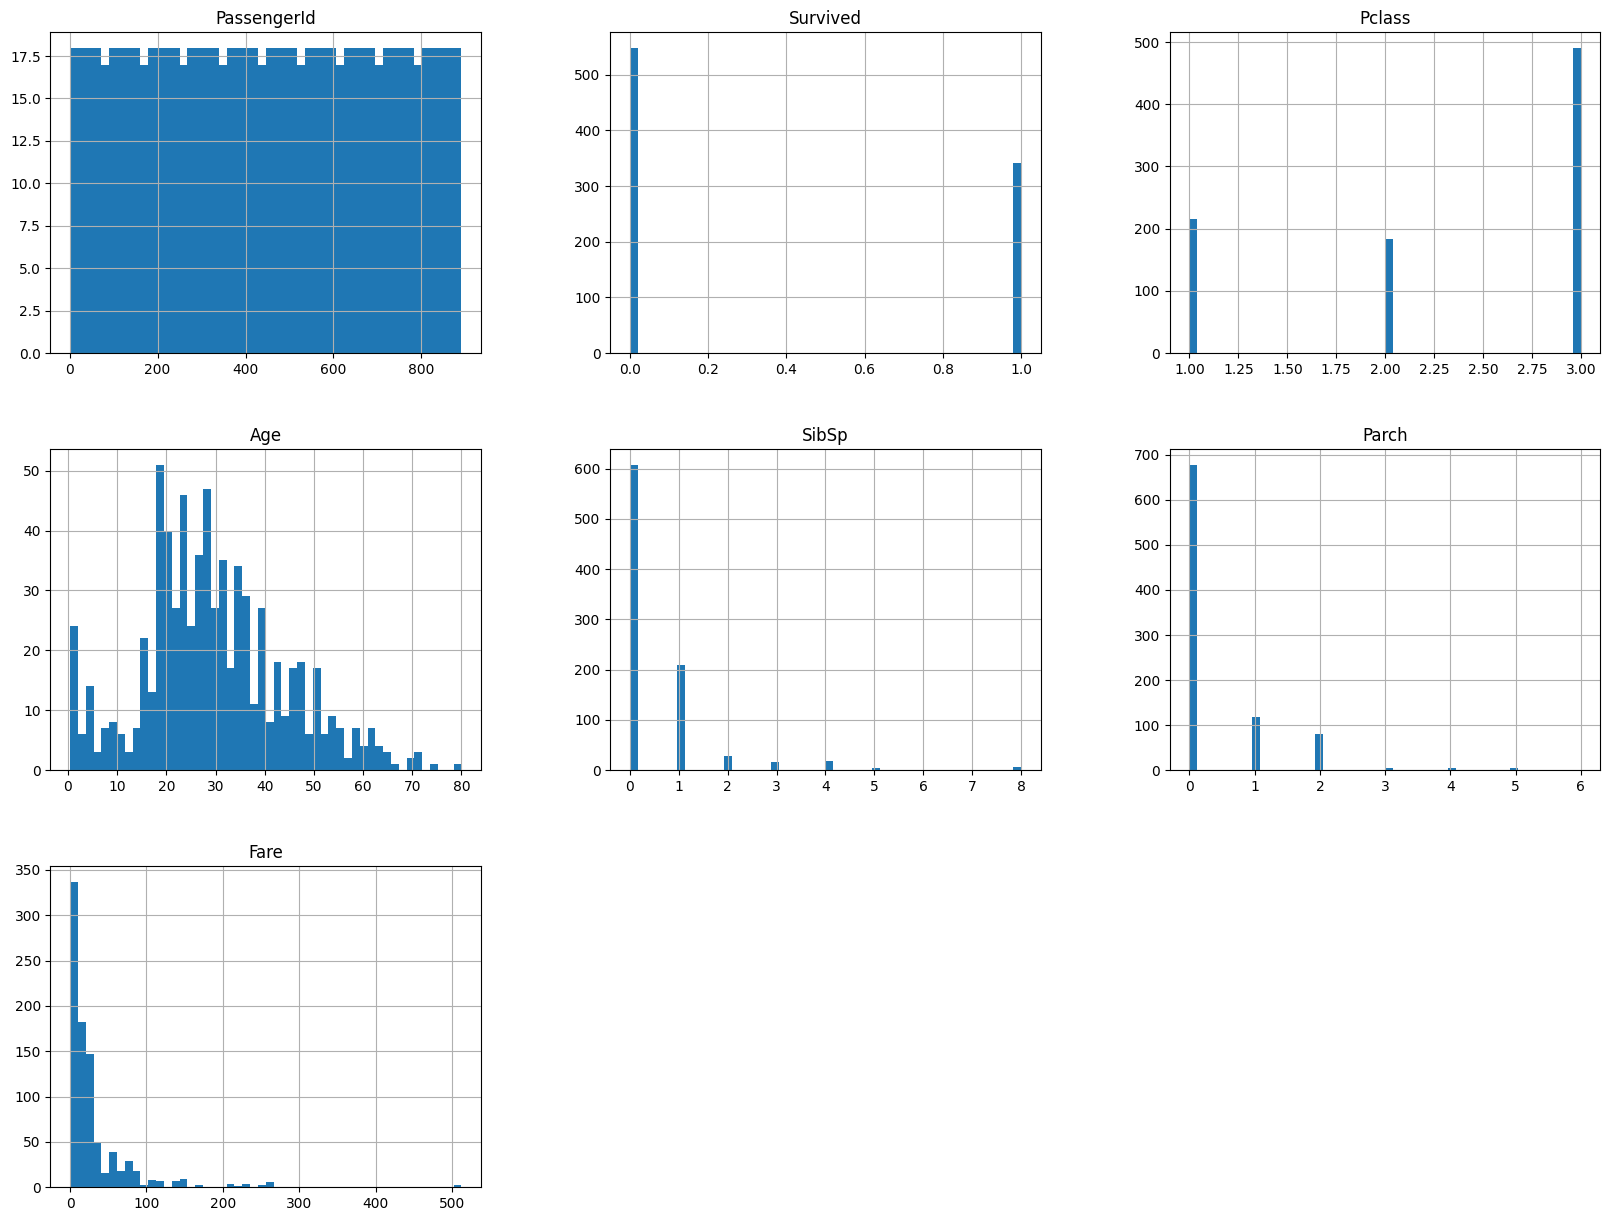

In [6]:
train_data.hist(bins = 50, figsize = (20,15))
plt.show()

In [7]:
train_data.duplicated().sum()

np.int64(0)

In [8]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_data = train_data.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis=1)

In [11]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


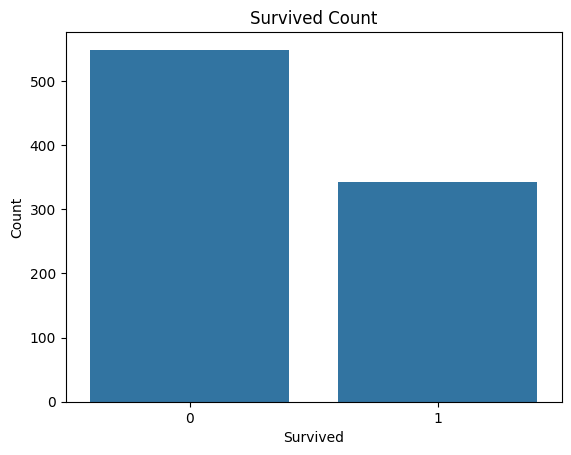

In [12]:
sns.countplot(x = 'Survived', data = train_data)
plt.title('Survived Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

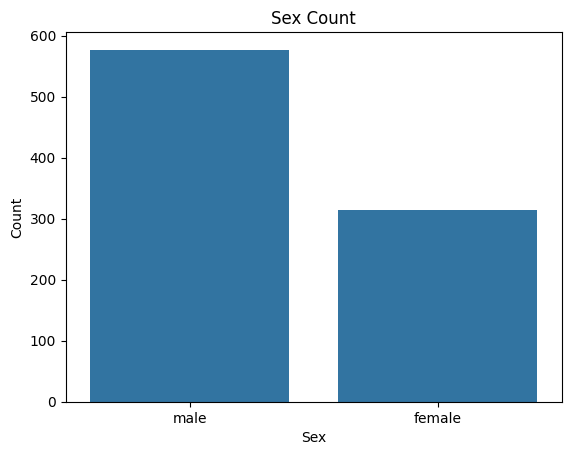

In [13]:
sns.countplot(x = 'Sex', data = train_data)
plt.title('Sex Count')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

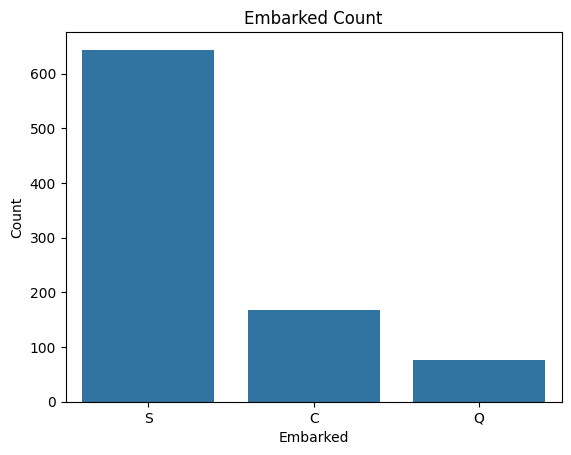

In [14]:
sns.countplot(x = 'Embarked', data = train_data)
plt.title('Embarked Count')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

In [15]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data['Embarked'] = train_data['Embarked'].fillna('MIS')

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [17]:
train_data['Fare'] = train_data['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

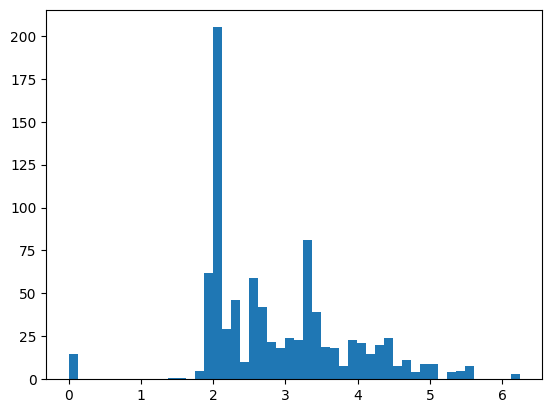

In [18]:
plt.hist(train_data['Fare'], bins = 50)
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])

In [20]:
train_data = pd.get_dummies(train_data, columns = ['Sex', 'Embarked'])

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Sex_female    891 non-null    bool   
 7   Sex_male      891 non-null    bool   
 8   Embarked_C    891 non-null    bool   
 9   Embarked_MIS  891 non-null    bool   
 10  Embarked_Q    891 non-null    bool   
 11  Embarked_S    891 non-null    bool   
dtypes: bool(6), float64(2), int64(4)
memory usage: 47.1 KB


In [22]:
test_data = pd.read_csv('/content/data/test.csv')
test_target = pd.read_csv('/content/data/gender_submission.csv')
display(test_data.head())
display(test_target.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [23]:
test_data = test_data.merge(test_target, on = 'PassengerId')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [24]:
def data_preprocessing(data):
  data = data.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis=1)
  data['Age'] = data['Age'].fillna(data['Age'].mean())
  if(data['Embarked'].isnull().sum() > 0):
    data['Embarked'] = data['Embarked'].fillna('MIS')
    data = pd.get_dummies(data, columns = ['Sex', 'Embarked'])
  else:
    data['Embarked_MIS'] = False
    data = pd.get_dummies(data, columns = ['Sex', 'Embarked'])
  data['Fare'] = data['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)
  data[['Age', 'Fare']] = scaler.transform(data[['Age', 'Fare']])
  return data


In [25]:
test_data = data_preprocessing(test_data)

In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Age           418 non-null    float64
 2   SibSp         418 non-null    int64  
 3   Parch         418 non-null    int64  
 4   Fare          418 non-null    float64
 5   Survived      418 non-null    int64  
 6   Embarked_MIS  418 non-null    bool   
 7   Sex_female    418 non-null    bool   
 8   Sex_male      418 non-null    bool   
 9   Embarked_C    418 non-null    bool   
 10  Embarked_Q    418 non-null    bool   
 11  Embarked_S    418 non-null    bool   
dtypes: bool(6), float64(2), int64(4)
memory usage: 22.2 KB


In [27]:
test_data = test_data[train_data.columns]

In [28]:
X_train = train_data.drop('Survived', axis = 1)
y_train = train_data['Survived']

X_test = test_data.drop('Survived', axis = 1)
y_test = test_data['Survived']

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9354066985645934
Confusion Matrix:
 [[249  17]
 [ 10 142]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       266
           1       0.89      0.93      0.91       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.93       418
weighted avg       0.94      0.94      0.94       418



In [39]:
from sklearn.svm import SVC

model = SVC(C = 1, kernel = 'rbf', gamma= 0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 0.792368125701459
Accuracy: 0.992822966507177
Confusion Matrix:
 [[266   0]
 [  3 149]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       266
           1       1.00      0.98      0.99       152

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



In [34]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.83798883 0.8258427  0.81460674 0.80337079 0.83707865]
Mean Accuracy: 0.8237775406440274


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.8237838177138912
